In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_clfression

In [3]:
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isnull().sum().max()

0

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<AxesSubplot:>

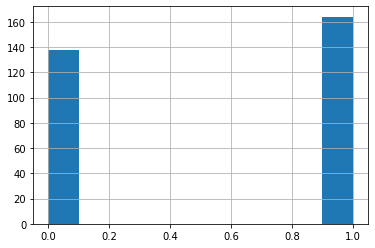

In [11]:
df.target.hist()

In [12]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

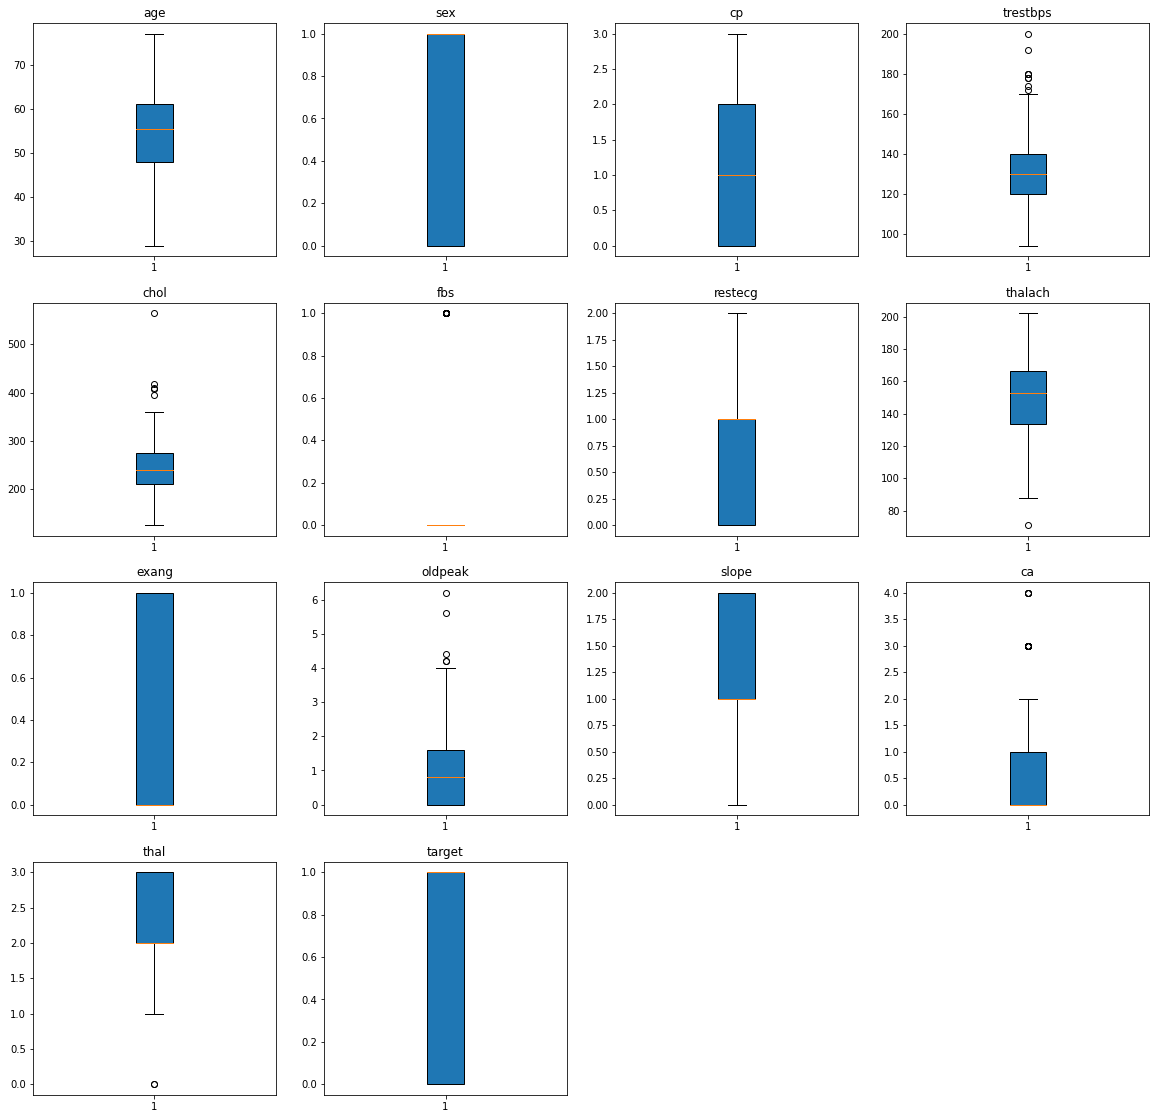

In [12]:
#Assess distribution of features
plt.figure(figsize=(20,30))
i = 1
for column in df.columns:
    plt.subplot(6,4,i)
    plt.boxplot(df[column], patch_artist=True)
    plt.title(column)
    i += 1

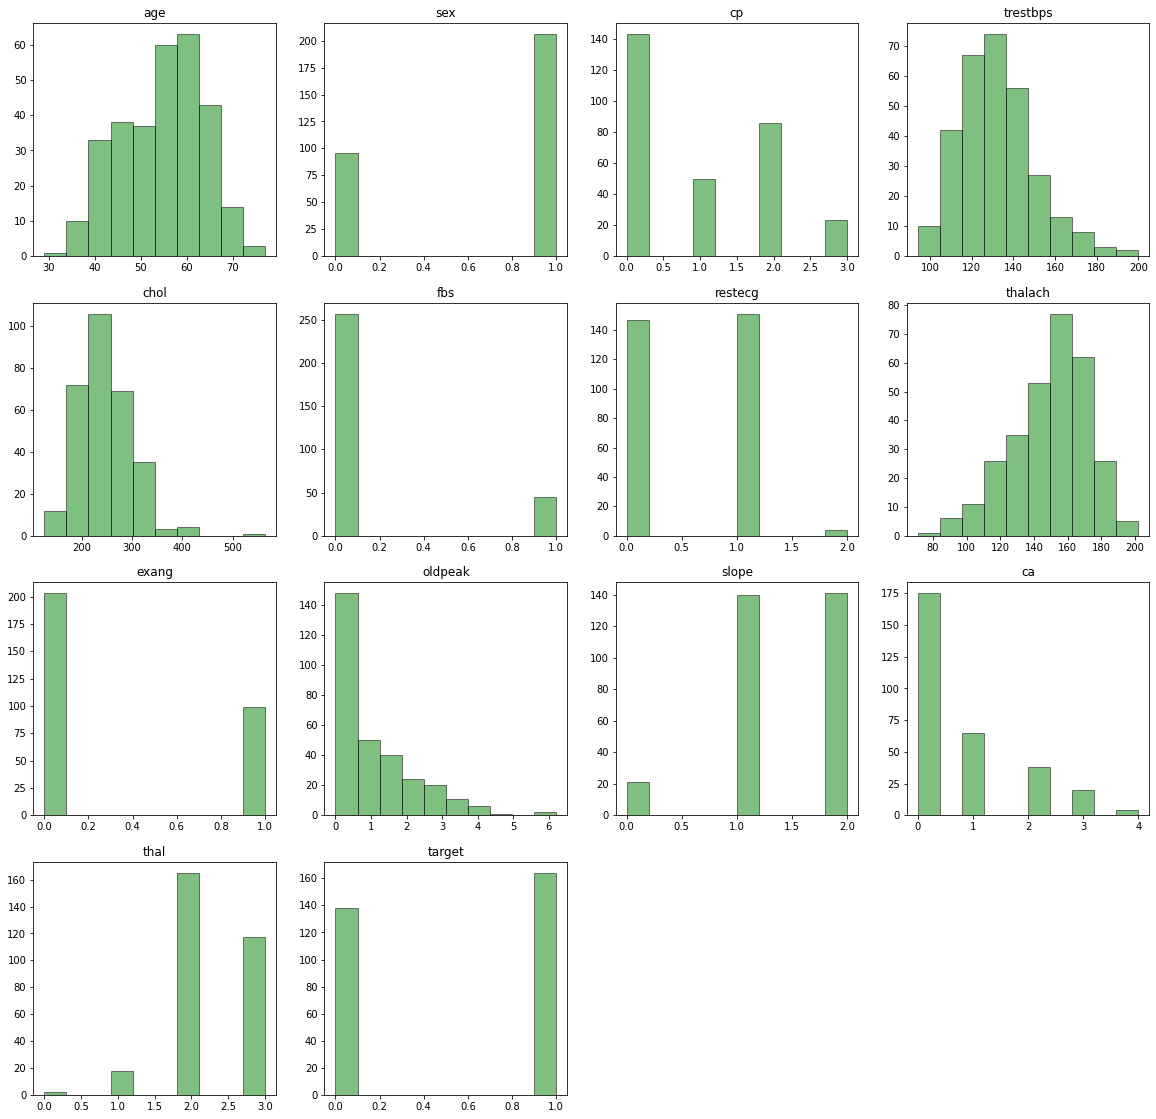

In [13]:
#Assess distribution of features
plt.figure(figsize=(20,30))
i = 1
for column in df.columns:
    plt.subplot(6,4,i)
    plt.hist(df[column], color='green', edgecolor = 'black', alpha = 1/2)
    plt.title(column)
    i += 1

In [13]:
categorical = ['exang','fbs','sex']

In [14]:
numeric_features = ['age','trestbps','oldpeak','thalach','chol','ca','slope','thal']

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
columns_to_normelize = ['trestbps', 'thalach', 'oldpeak','chol']

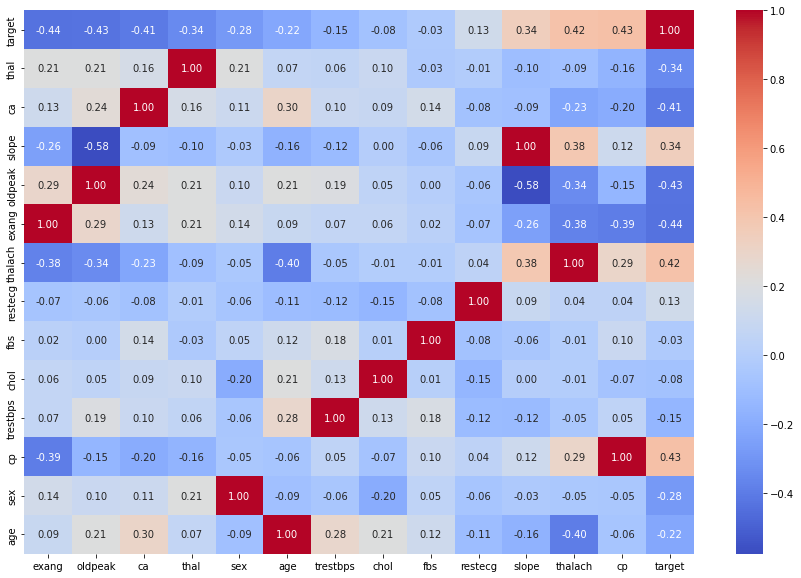

In [18]:
#Sorted heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().sort_values(by='target').T[::-1],cmap='coolwarm',annot=True, fmt=".2f");

In [19]:
def feature_extraction(data):
    #UNIVARIATE SELECTION
    # Feature Extraction with Univariate Statistical Tests (f_clfression)
    # load data
    X = data.drop('target',axis=1)
    y = data['target']
    names=pd.DataFrame(X.columns)
    model = SelectKBest(score_func=f_clfression, k=4)
    results = model.fit(X, y)
    
    results_df=pd.DataFrame(results.scores_)
    #Concat and name columns
    scored=pd.concat([names,results_df], axis=1)
    scored.columns = ["Feature", "Score"]
    scored.sort_values(by=['Score'],ascending=False)
    final_columns = scored[scored.Score >0]
    df_sol = final_columns.sort_values(by=['Score'],ascending=True)

    return df_sol

In [20]:
feature_extraction(df)

,Feature,Score
5,fbs,0.216045
4,chol,2.002888
6,restecg,5.558449
3,trestbps,6.558676
0,age,15.474511
1,sex,26.240952
12,thal,40.027376
10,slope,40.249626
11,ca,60.262749
7,thalach,64.237793


In [17]:
#Assess distribution of features
def log_normelize(data, columns_to_normelize):
    plt.figure(figsize=(20,30))
    i = 1
    for column in data[columns_to_normelize]:
        plt.subplot(6,4,i)
        data[column] = np.log1p(data[column])
        plt.hist(data[column])
        plt.title(column)
        i += 1

In [22]:
features = df.drop('target', axis=1).columns

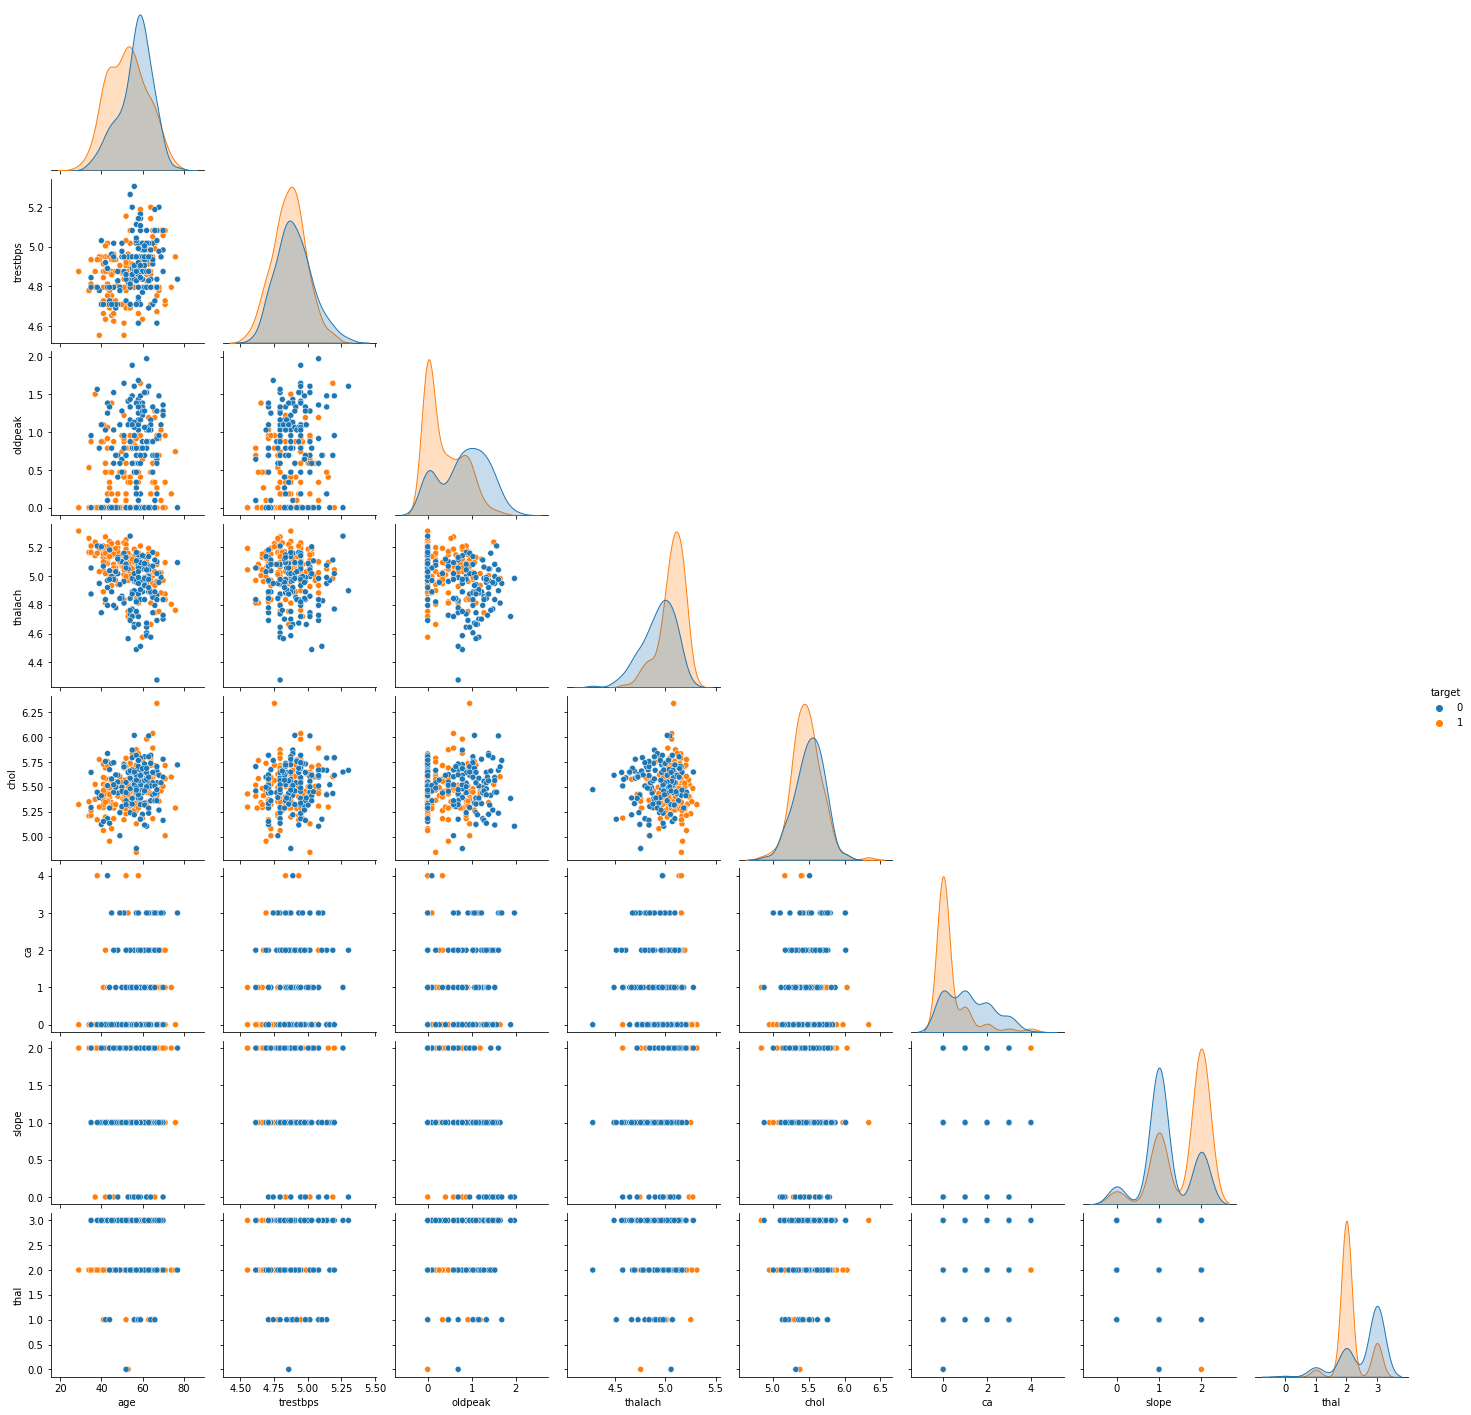

In [25]:
numeric_features.append('target')
sns.pairplot(data=df[numeric_features], hue='target', corner=True)

### CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb
import pickle
from os.path import exists
from sklearn.feature_selection import SelectKBest,f_regression


In [140]:
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
import pickle

In [210]:
# Model configuration
params = {'gb_clf': {
                        'learning_rate': [0.1], 
                        'n_estimators': [2000], 
                        'max_depth': [8], 
                        'min_samples_split': [3], 
                        'min_samples_leaf': [7], 
                        'max_features':[1],
                        'max_leaf_nodes': [40],
                    },
          'knn_clf': {
                        'n_neighbors': range(2, 40),
                        'weights': ["uniform", "distance"],
                        'random_state': [100],
                        'n_jobs' : [-1],
                     },
          'lin_clf': {},
          'xtree_clf': {
                        'n_estimators': [100, 500, 1000], 
                        'max_leaf_nodes' : [10,15,20],
                        'n_jobs' : [-1],
                        'random_state': [100]
                       },
          'rf_clf': {
                        'n_estimators': [500,700,1000],
                        'max_depth': list(range(4,9,2)),
                        'min_samples_split': list(range(4,9,2)),
                        'min_samples_leaf': [1,2,5,7],
                        'max_features': ['auto','sqrt']
                    },
          'dt_clf': {
                        'random_state': [100],
                        'criterion': ["gini"],  
                        'n_jobs' : [-1],
                        'warn_singular': False
                    },
          'stac_clf': {
                        'random_state': [100],
                        'n_jobs' : [-1],
                      },
          'lgb_clf': {
                        'boosting_type': ['gbdt'],  
                        'objective': 'binary:logistic',
                        'learning_rate' : [0.01, 0.03],
                        'n_estimators' : [100, 500],
                        'max_depth' : [4,8],
                        'min_child_samples' : [10,20],
                        'min_child_weight' : [0.01,0.05],
                      },
           'xgb_clf': {
                        'max_depth': [4],
                        'min_child_weight': [3],
                        'subsample': [0.7,0.8,1.0],
                        'n_estimators' : [1000],
                        'max_leaves' : [0],
                        'colsample_bylevel':[1], 
                        'colsample_bynode':[1], 
                        'colsample_bytree':[1], 
                        'gamma':[0], 
                        'learning_rate':[0.3], 
                        'max_delta_step':[0], 
                        'n_jobs':[-1], 
                        'num_parallel_tree':[1], 
                        'reg_alpha':[0], 
                        'reg_lambda':[1],
                        'objective':['binary:logistic'],
                        'eval_metric':['auc'],
                        'booster':['gbtree'],
                        'nthread':[4], 
                        'seed':[2],
                        'random_state':[0],
                        'gpu_id':[-1],
                        'predictor':['gpu_predictor']
                      }       
           }

models = {'rf_clf': RandomForestClassifier, 
          'lin_clf': LogisticRegression,
          'knn_clf': KNeighborsClassifier,
          'xgb_clf': XGBClassifier,
          'lgb_clf': LGBMClassifier,
          'xtree_clf': ExtraTreesClassifier,
          'stac_clf': StackingClassifier,
          'dt_clf': DecisionTreeClassifier,
          'gb_clf': GradientBoostingClassifier}

In [215]:
class Clf_Model:
    def __init__(self, data, model=None, params=None):
        self.df = data
        self.test_size = 0.2
        self.X ,self.y = self.set_x_y(self.df)
        self.X_train, self.X_test, self.y_train, self.y_test = self.test_split()
        self.r_score = 0
        self.model = model
        self.model_name = model().__class__.__name__
        self.path = 'models/' + self.model_name + ".sav"
        self.params = params
        

    def set_x_y(self, data):
        # set the X,y parameters
        return data.drop('target',axis=1), data['target']

    def test_split(self):
        # Create the train-test data
        return train_test_split(self.X, self.y, test_size=self.test_size, random_state=77)

    def normelize_data(self):
        # Run a standart normaliztion
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)
    
    def prepare_data(self, data):
        # Prepare the data for the model
        self.X ,self.y = self.set_x_y(data)
        self.X_train, self.X_test, self.y_train, self.y_test = self.test_split()
        self.normelize_data()
    
    def load_pickle(self):
        # load the model from file
        loaded_model = pickle.load(open(self.path, 'rb'))
        return loaded_model
    
    def save_model(self, model):
        # save the model to disk
        pickle.dump(model, open(self.path, 'wb'))

    def search_and_fit(self):
        search = GridSearchCV(self.model(), self.params, scoring='roc_auc', cv=10)
        search.fit(self.X_train, self.y_train)
        return self.model(**search.best_params_)

    def fit_predict_score(self, data, show=True, opt=False):
        # Check if model exsist in models/<model_name>.sav
        if not exists(self.path):
            # Check if params was send, or a default model.
            print("No model were on file")
            if self.params:
                # Fit the new model 
                print("Finding best params with gridsearch")
                clf_model = self.search_and_fit()
            else:
                # No param were added, defauls settings
                print("No params were sent, loading default model")
                clf_model = self.model()       
        else:
            # load a saved model
            print("Found saved model on disk")
            print(f"Loading model {self.model_name}.sav from file")
            clf_model = self.load_pickle()
        # prepare the data
        self.prepare_data(data)
        # Fit and Predict
        print("Done preprocessing prodecures -> Fit & Predict")
        clf_model.fit(self.X_train, self.y_train)
        self.y_pred = clf_model.predict(self.X_test)
        self.y_train_pred = clf_model.predict(self.X_train)
        # Save the new model 
        print(f"Saving new model to file: {self.model_name}.sav")
        self.save_model(clf_model)
        if show:
            self.report_results(clf_model)
        return accuracy_score(self.y_train, self.y_train_pred), accuracy_score(self.y_test, self.y_pred)

    def roc(self, clf_model):
        logit_roc_auc = roc_auc_score(self.y_test, clf_model.predict(self.X_test))
        fpr, tpr, thresholds = roc_curve(self.y_test, clf_model.predict_proba(self.X_test)[:,1])
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, label=f"{self.model_name}(area = {round(logit_roc_auc,2)})")
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.savefig('Log_ROC')
        plt.show()

    def report_results(self, clf_model):
        print(f"Accuracy/Score: {accuracy_score(self.y_test, self.y_pred)}")
        print(f"Precision = {precision_score(self.y_test, self.y_pred)}\n")
        print(f"Confusion Matrix:\n {confusion_matrix(self.y_test, self.y_pred)}")
        plot_confusion_matrix(clf_model, self.X_test, self.y_test,values_format="d",cmap='Blues')
        print(classification_report(self.y_test, self.y_pred, digits=4))
        self.roc(clf_model)

    def feature_extraction(self, data):
        #UNIVARIATE SELECTION
        # Feature Extraction with Univariate Statistical Tests (f_regression)
        # load data
        X, y = self.set_x_y(data)
        names=pd.DataFrame(X.columns)
        model = SelectKBest(score_func=f_regression, k=4)
        results = model.fit(X, y)
        results_df=pd.DataFrame(results.scores_)
        #Concat results_df and name columns
        scored=pd.concat([names,results_df], axis=1)
        scored.columns = ["Feature", "Score"]
        scored.sort_values(by=['Score'],ascending=False)
        final_columns = scored[scored.Score >0]
        df_sol = final_columns.sort_values(by=['Score'],ascending=True)
        return df_sol

    def feature_reduction(self, data):
        ## Perfonm the feature reduction by the corr vlaues
        df_new = data.copy()
        to_drop = self.feature_extraction(data).iloc[0]['Feature']
        print(f"Checking to drop: {to_drop}")
        df_new.drop(to_drop, axis=1, inplace=True)
        # train/test/split again after droping column
        _, new_r_test = self.fit_predict_score(df_new,0)
        if new_r_test < self.r_score:
            return 0, data
        return 1, df_new

    def optimize_model(self):
        """
        Run the optimization untill no progress is reached
        """
        done = False
        new_df = self.df.copy()
        while(not done):
            result, new_df = self.feature_reduction(new_df)
            r_train_score, r_test_score = self.fit_predict_score(new_df,0)
            print(f"Result: {result}, r_train: {r_train_score}, r_test: {r_test_score}")
            if result == 0:
                print("Abort deleting feature")
                done = True
            else:
                self.r_score = r_test_score
        return new_df

In [193]:
# Prepare the data for the model
df = pd.read_csv('data/heart_final.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,4.983607,5.455321,1,0,5.017280,0,1.193922,0,0,1,1
1,37,1,2,4.875197,5.525453,0,1,5.236442,0,1.504077,0,0,2,1
2,41,0,1,4.875197,5.323010,0,0,5.153292,0,0.875469,2,0,2,1
3,56,1,1,4.795791,5.468060,0,1,5.187386,0,0.587787,2,0,2,1
4,57,0,0,4.795791,5.872118,0,1,5.099866,1,0.470004,2,0,2,1


## XGBoost

In [194]:
# Initialize the model
xgb_model = Clf_Model(df, models['xgb_clf'])

In [195]:
xgb_model.model

xgboost.sklearn.XGBClassifier

Found saved model on disk
Loading model XGBClassifier.sav from file
Done preprocessing prodecures -> Fit & Predict
Saving new model to file: XGBClassifier.sav
Accuracy/Score: 0.819672131147541
Precision = 0.7948717948717948

Confusion Matrix:
 [[19  8]
 [ 3 31]]
              precision    recall  f1-score   support

           0     0.8636    0.7037    0.7755        27
           1     0.7949    0.9118    0.8493        34

    accuracy                         0.8197        61
   macro avg     0.8293    0.8077    0.8124        61
weighted avg     0.8253    0.8197    0.8166        61



c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


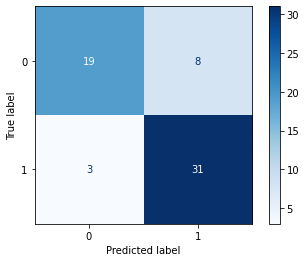

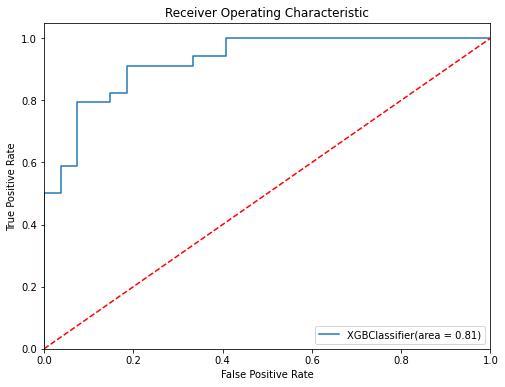

1.0 0.819672131147541


In [196]:
# Run first time for reference comparison
r_trian_score, xgb_model.r_score = xgb_model.fit_predict_score(df,1)
print(r_trian_score, xgb_model.r_score)

In [202]:
model = xgb_model.load_pickle()

In [218]:
xgb_model = Clf_Model(df, models['xgb_clf'], params['xgb_clf'])

No model were on file
Finding best params with gridsearch
Done preprocessing prodecures -> Fit & Predict
Saving new model to file: XGBClassifier.sav
Accuracy/Score: 0.819672131147541
Precision = 0.7948717948717948

Confusion Matrix:
 [[19  8]
 [ 3 31]]
              precision    recall  f1-score   support

           0     0.8636    0.7037    0.7755        27
           1     0.7949    0.9118    0.8493        34

    accuracy                         0.8197        61
   macro avg     0.8293    0.8077    0.8124        61
weighted avg     0.8253    0.8197    0.8166        61



c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


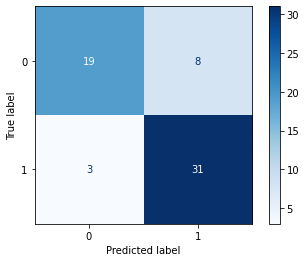

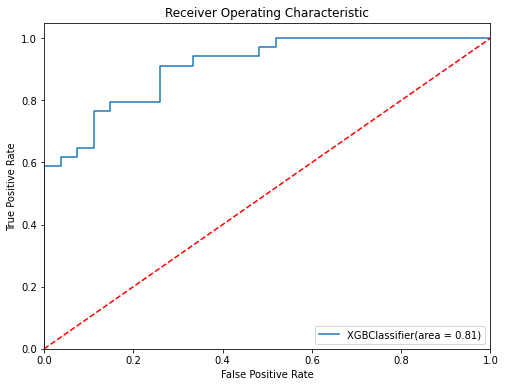

1.0 0.819672131147541


In [220]:
r_trian_score, xgb_model.r_score = xgb_model.fit_predict_score(df,1)
print(r_trian_score, xgb_model.r_score)

In [221]:
# Optimaze the data with features redumption
opt_df = xgb_model.optimize_model()

Checking to drop: fbs
Found saved model on disk
Loading model XGBClassifier.sav from file
Done preprocessing prodecures -> Fit & Predict
Saving new model to file: XGBClassifier.sav
Found saved model on disk
Loading model XGBClassifier.sav from file
Done preprocessing prodecures -> Fit & Predict
Saving new model to file: XGBClassifier.sav
Result: 1, r_train: 1.0, r_test: 0.819672131147541
Checking to drop: chol
Found saved model on disk
Loading model XGBClassifier.sav from file
Done preprocessing prodecures -> Fit & Predict
Saving new model to file: XGBClassifier.sav
Found saved model on disk
Loading model XGBClassifier.sav from file
Done preprocessing prodecures -> Fit & Predict
Saving new model to file: XGBClassifier.sav
Result: 0, r_train: 1.0, r_test: 0.819672131147541
Abort deleting feature


Accuracy/Score: 0.8360655737704918
Precision = 0.8157894736842105

Confusion Matrix:
 [[20  7]
 [ 3 31]]
              precision    recall  f1-score   support

           0     0.8696    0.7407    0.8000        27
           1     0.8158    0.9118    0.8611        34

    accuracy                         0.8361        61
   macro avg     0.8427    0.8263    0.8306        61
weighted avg     0.8396    0.8361    0.8341        61



c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


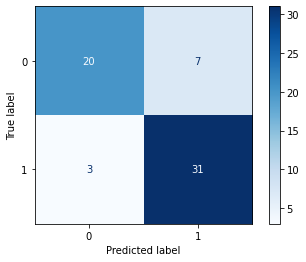

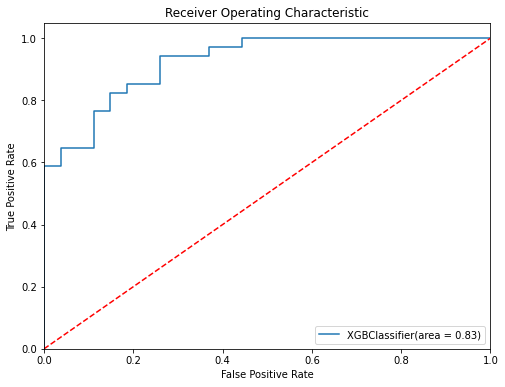

In [95]:
# Load the optimize data set and rerun the model
xgb_model.df = opt_df.copy()
xgb_score_pred, xgb_score_train = xgb_model.fit_predict_score(opt_df)

In [209]:
# grid search for parameters tuning
param_search = {
    'max_depth': [4],
    'min_child_weight': [3],
    'subsample': [0.7,0.8,1.0],
    'n_estimators' : [1000],
    'max_leaves' : [0],
    'colsample_bylevel':[1], 
    'colsample_bynode':[1], 
    'colsample_bytree':[1], 
    'gamma':[0], 
    'learning_rate':[0.3], 
    'max_delta_step':[0], 
    'n_jobs':[-1], 
    'num_parallel_tree':[1], 
    'reg_alpha':[0], 
    'reg_lambda':[1],
    'objective':['binary:logistic'],
    'eval_metric':['auc'],
    'booster':['gbtree'],
    'nthread':[4], 
    'seed':[2],
    'random_state':[0],
    'gpu_id':[-1],
    'predictor':['gpu_predictor']
}
estimator = xgb.XGBClassifier(objective='binary:logistic',
                              eval_metric='auc',
                              booster='gbtree',
                              nthread=4, 
                              seed=2,
                              random_state=0,
                              gpu_id=-1,
                              predictor='gpu_predictor'
                              )
xgb_clf_1 = GridSearchCV(estimator, 
                         param_grid=param_search, 
                         scoring='roc_auc', 
                         n_jobs=-1, 
                         cv=5)

In [635]:
xgb_clf_opt= xgb.XGBClassifier(**xgb_clf_1.best_params_)

In [636]:
# Initialize the model
xgb_model_opt = Clf_Model(opt_df, xgb_clf_opt)

In [639]:
xgb_clf_opt.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=2000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)>

Accuracy/Score: 0.8524590163934426
Precision = 0.8205128205128205

Confusion Matrix:
 [[20  7]
 [ 2 32]]
              precision    recall  f1-score   support

           0     0.9091    0.7407    0.8163        27
           1     0.8205    0.9412    0.8767        34

    accuracy                         0.8525        61
   macro avg     0.8648    0.8410    0.8465        61
weighted avg     0.8597    0.8525    0.8500        61



c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


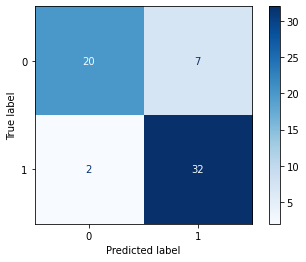

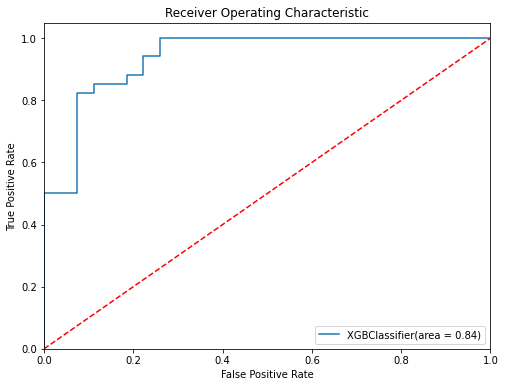

In [638]:
xgb_model_opt.fit_predict_score(opt_df)
xgb_model_opt.report_results()

## CATBoost

In [646]:
import catboost as cb

In [647]:
X, y = df_short.drop(['target','fbs','chol'],axis=1), df_short['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [672]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [673]:
cat_clf = cb.CatBoostClassifier(task_type='GPU', 
                                loss_function='Logloss',  
                                random_state=10,
                                silent = True
                                )

In [674]:
grid = {'learning_rate': [0.1],
        'depth': [10],
        'l2_leaf_reg': [5],
        'iterations': [50],
        }

In [675]:
cat_clf.grid_search(grid, train_dataset);

bestTest = 0.3572654724
bestIteration = 38
0:	loss: 0.3572655	best: 0.3572655 (0)	total: 5.19s	remaining: 0us
Estimating final quality...
Training on fold [0/3]
bestTest = 0.3843275941
bestIteration = 42
Training on fold [1/3]
bestTest = 0.3969820023
bestIteration = 24
Training on fold [2/3]
bestTest = 0.460631752
bestIteration = 36


In [678]:
y_pred = cat_clf.predict(X_test)

Accuracy/Score: 0.8360655737704918
Precision = 0.8

Confusion Matrix:
 [[19  8]
 [ 2 32]]
              precision    recall  f1-score   support

           0     0.9048    0.7037    0.7917        27
           1     0.8000    0.9412    0.8649        34

    accuracy                         0.8361        61
   macro avg     0.8524    0.8224    0.8283        61
weighted avg     0.8464    0.8361    0.8325        61



c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


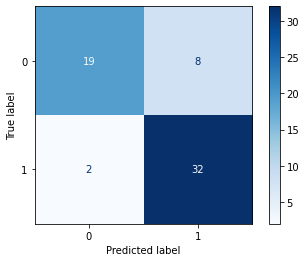

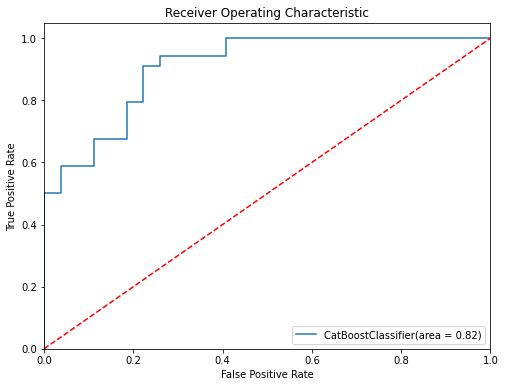

In [679]:
report_results(cat_clf)

## LightBGM

In [680]:
import lightgbm as ltb

In [688]:
grid = {'learning_rate': [0.1],
        'max_depth': [10],
        'min_child_samples': [20],
        'n_estimators': [100],
        }

In [727]:
# grid search for parameters tuning
param_search = {
}
estimator = ltb.LGBMClassifier(n_estimators=5000,
                               min_split_gain = 0.0,
                               min_child_samples=10,
                               colsample_bytree=0.8, 
                               objective= 'binary',  
                               seed=2,
                               silent = True,
                               max_depth = 4,
                               min_child_weight = 5,
                               learning_rate = 0.001,
                               subsample = 0.7,
                               num_leaves = 31,
                              )
search = GridSearchCV(estimator, 
                      param_grid=param_search, 
                      scoring='roc_auc', 
                      n_jobs=-1, 
                      cv=5)

In [728]:
search.fit(X_train, y_train) 

c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


GridSearchCV(cv=5,
             estimator=LGBMClassifier(colsample_bytree=0.8, learning_rate=0.001,
                                      max_depth=4, min_child_samples=10,
                                      min_child_weight=5, n_estimators=5000,
                                      objective='binary', seed=2, silent=True,
                                      subsample=0.7),
             n_jobs=-1, param_grid={}, scoring='roc_auc')

In [729]:
lgbm_clf = ltb.LGBMClassifier(**search.best_params_)

In [730]:
lgbm_clf.fit(X_train,y_train)

LGBMClassifier()

In [731]:
lgbm_clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [732]:
y_pred = lgbm_clf.predict(X_test)

Accuracy/Score: 0.8524590163934426
Precision = 0.8205128205128205

Confusion Matrix:
 [[20  7]
 [ 2 32]]
              precision    recall  f1-score   support

           0     0.9091    0.7407    0.8163        27
           1     0.8205    0.9412    0.8767        34

    accuracy                         0.8525        61
   macro avg     0.8648    0.8410    0.8465        61
weighted avg     0.8597    0.8525    0.8500        61



c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


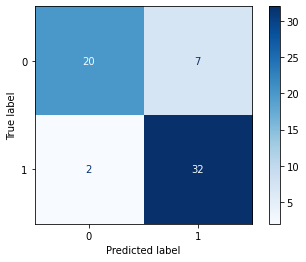

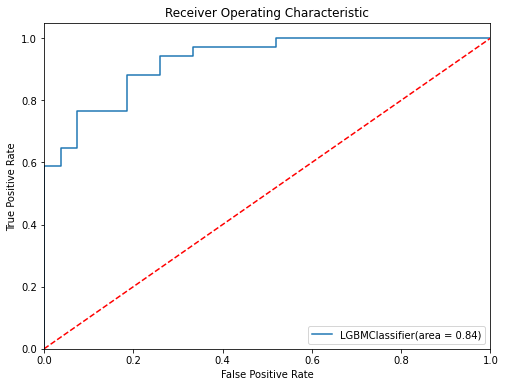

In [733]:
report_results(lgbm_clf)

### Stacking

In [150]:
from sklearn.ensemble import StackingClassifier 
from sklearn.linear_model import LogisticRegression

In [734]:
estimators = [
    ('xgb', xgb_clf_opt),
    ('cat', cat_clf),
    ('lgb', lgbm_clf)
    ]

In [735]:
stac_clf= StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [738]:
stac_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.001, max_bin=256,
                                              ma...onehot=4,
                                              max_delta_step=0, max_depth=4,
                                              max_leaves=0, min_child_weight=3,
                                              missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=2000, n_jobs=0,
                                              num_parallel_tree=1,
                                              predictor='auto', random_state=0,
                                              reg_alpha=0, reg_lambda=1, ...)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x0000018C26B10910>),
                               ('lgb', LGBMClassifier())],
                   final_estimator=LogisticRegression())

In [739]:
y_pred = stac_clf.predict(X_test)

Accuracy/Score: 0.8524590163934426
Precision = 0.8205128205128205

Confusion Matrix:
 [[20  7]
 [ 2 32]]
              precision    recall  f1-score   support

           0     0.9091    0.7407    0.8163        27
           1     0.8205    0.9412    0.8767        34

    accuracy                         0.8525        61
   macro avg     0.8648    0.8410    0.8465        61
weighted avg     0.8597    0.8525    0.8500        61



c:\Users\berge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


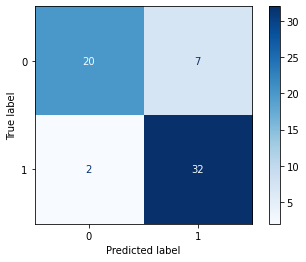

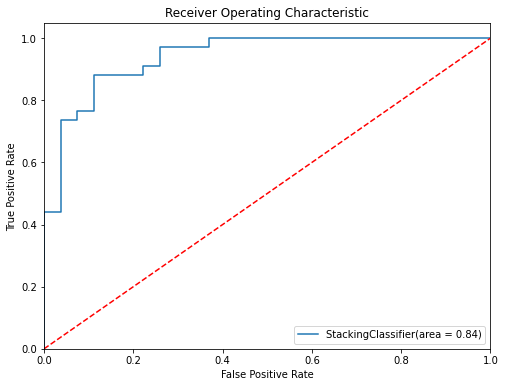

In [740]:
report_results(stac_clf)